In [32]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sympy as sym
display.set_matplotlib_formats('svg')

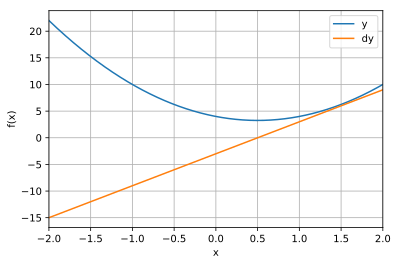

In [33]:
def fx(x):
    return 3*x**2 - 3*x + 4

def dx(x):
    return 6*x - 3

x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, dx(x))
plt.xlim([x[0], x[-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

In [34]:
# Gradient descent
learningrate = 0.01
epochs = 100
min = np.zeros(epochs)
min[0] = np.random.choice(x, 1)[0]

for i in range(epochs):
    grad = dx(min[i])
    if i < epochs - 1:
        min[i+1] = min[i] - learningrate * grad
print(f'min={min[-1]}')

min=0.5023084550613541


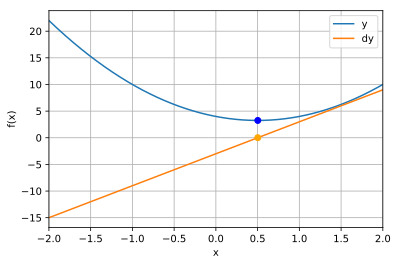

In [35]:
plt.plot(x, fx(x), x, dx(x))
plt.plot(min[-1], dx(min[-1]), 'o', color='orange')
plt.plot(min[-1], fx(min[-1]), 'bo')
plt.xlim([x[0], x[-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

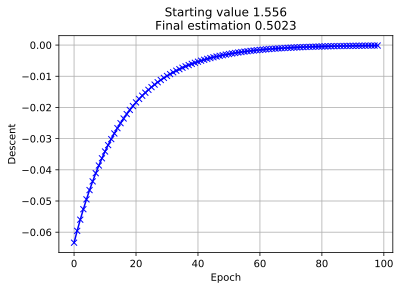

In [36]:
plt.plot(range(len(min)-1), min[1:] - min[:-1], 'bx-')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Descent')
plt.title(f'Starting value {np.round(min[0], 4)}\nFinal estimation {np.round(min[-1], 4)}')
plt.show()

min=0.0


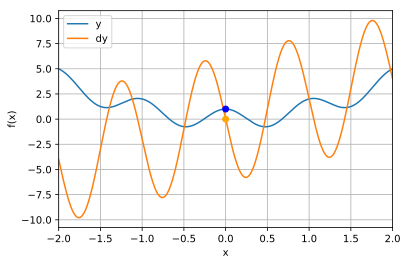

In [37]:
# Gradient descent case study: Unfortunate starting point# 

def fx(x):
    return np.cos(2 * np.pi * x) + x**2

def dx(x):
    return - 2 * np.pi * np.sin(2 * np.pi * x) + 2 * x

x = np.linspace(-2, 2, 2_001)

learningrate = 0.01
epochs = 1000
min = np.zeros(epochs)

min[0] = 0
# min[0] = np.random.choice(x, 1)[0]

for i in range(epochs):
    grad = dx(min[i])
    if i < epochs - 1:
        min[i+1] = min[i] - learningrate * grad
print(f'min={min[-1]}')

plt.plot(x, fx(x))
plt.plot(x, dx(x))
plt.plot(min[-1], fx(min[-1]), 'bo')
plt.plot(min[-1], dx(min[-1]), 'o', color='orange')
plt.grid()
plt.xlim(x[0], x[-1])
plt.legend(['y','dy'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [38]:
# Gradient descent in 2D
def peaks(x,y):
    # expand to a 2D mesh
    x,y = np.meshgrid(x,y)    
    return 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2)- 1/3*np.exp(-(x+1)**2 - y**2)

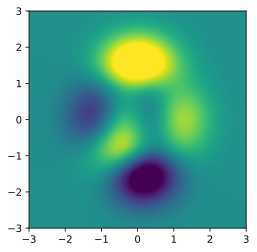

In [39]:
x = np.linspace(-3, 3, 2001)
y = np.linspace(-3, 3, 2001)
z = peaks(x, y)
plt.imshow(z, extent=[ x[0], x[-1], y[0], y[-1] ], vmin=-5, vmax=5, origin='lower')
plt.show()

In [40]:
x_, y_ = sym.symbols('x_,y_')
z_ = 3*(1-x_)**2 * sym.exp(-(x_**2) - (y_+1)**2) - 10*(x_/5 - x_**3 - y_**5) * sym.exp(-x_**2-y_**2)- 1/3*sym.exp(-(x_+1)**2 - y_**2)

df_x = sym.lambdify((x_,y_), sym.diff(z_,x_),'sympy')
df_y = sym.lambdify((x_,y_), sym.diff(z_,y_),'sympy')

print(df_x(1,1).evalf())

-1.07369833656079


startpoint=[ 1.27218635 -1.53444457]
localmin=[0.228278920556369 -1.62553495750000]


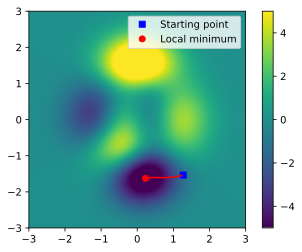

In [41]:
localmin = np.random.rand(2)*4 - 2 # Starting coordinates between -2 and 2
startpoint = localmin[:]           # make a copy instead of reassign

learningrate = .01
epochs       = 10_000

trajectory = np.zeros((epochs,2))

for i in range(epochs):
    gradient = np.array([df_x(localmin[0],localmin[1]).evalf(), df_y(localmin[0],localmin[1]).evalf()])
    localmin = localmin - gradient * learningrate
    trajectory[i,:] = localmin

print(f'startpoint={startpoint}')
print(f'localmin={localmin}')
plt.imshow(z, extent=[ x[0], x[-1], y[0], y[-1] ], vmin=-5, vmax=5, origin='lower')
plt.plot(startpoint[0],startpoint[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['Starting point', 'Local minimum'])
plt.colorbar()
plt.show()

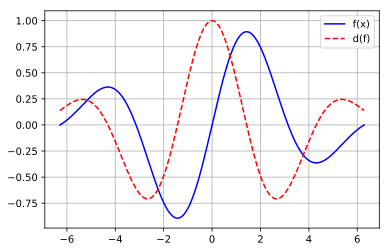

In [42]:
x = np.linspace(-2*np.pi,2*np.pi,401)

def f(x): 
    return np.sin(x) * np.exp(-x**2*.05)

def df(x):
    return np.cos(x) * np.exp(-x**2*.05) + np.sin(x) * (-.1*x)*np.exp(-x**2*.05)

plt.plot(x, f(x), 'b')
plt.plot(x, df(x), 'r--')
plt.legend(['f(x)', 'd(f)'])
plt.grid()
plt.show()

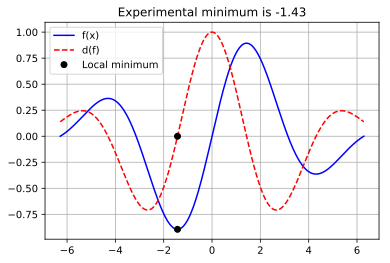

In [43]:
localmin = np.random.choice(x,1)
learningrate = .01
epochs = 10_000

for i in range(epochs):
    localmin = localmin - learningrate * df(localmin)

plt.plot(x, f(x), 'b')
plt.plot(x, df(x), 'r--')
plt.plot(localmin, f(localmin), 'ko')
plt.plot(localmin, df(localmin), 'ko')
plt.legend(['f(x)', 'd(f)', 'Local minimum'])
plt.grid()
plt.title(f'Experimental minimum is {np.round(localmin[0], 2)}')
plt.show()

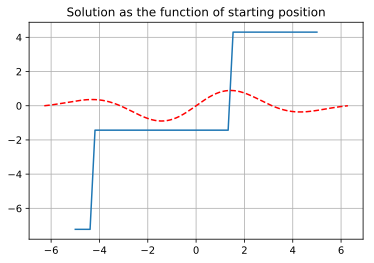

In [44]:
startingpositions = np.linspace(-5, 5, 50)
solutions = np.zeros( len(startingpositions) )

for idx,localmin in enumerate(startingpositions):
    for i in range(epochs):
        localmin = localmin - learningrate * df(localmin)
    solutions[idx] = localmin

plt.plot(startingpositions, solutions)
plt.plot(x, f(x), 'r--')
plt.grid()
plt.title('Solution as the function of starting position')
plt.show()